In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
from scipy.stats import linregress

In [3]:
# data for HIndexorizations from all hurricanes

HIndex_sandy = "./CleanEconData/Sandy_cln_housingpriceindex.csv"
HIndex_sandy_df = pd.read_csv(HIndex_sandy)
HIndex_sandy_df = HIndex_sandy_df[['Location','Hurricane','Housing Price Index','Delta','Housing Month']]

HIndex_rita = "./CleanEconData/rita_cln_housingpriceindex.csv"
HIndex_rita_df = pd.read_csv(HIndex_rita)
HIndex_rita_df = HIndex_rita_df[['Location','Hurricane','Housing Price Index','Delta','Housing Month']]

HIndex_katrina = "./CleanEconData/katrina_cln_housingpriceindex.csv"
HIndex_katrina_df = pd.read_csv(HIndex_katrina)
HIndex_katrina_df = HIndex_katrina_df[['Location','Hurricane','Housing Price Index','Delta','Housing Month']]

HIndex_ike = "./CleanEconData/Ike_cln_housingpriceindex.csv"
HIndex_ike_df = pd.read_csv(HIndex_ike)
HIndex_ike_df = HIndex_ike_df[['Location','Hurricane','Housing Price Index','Delta','Housing Month']]

HIndex_ivan = "./CleanEconData/Ivan_cln_housing.csv"
HIndex_ivan_df = pd.read_csv(HIndex_ivan)
HIndex_ivan_df = HIndex_ivan_df[['Location','Hurricane','Housing Price Index','Delta', 'Housing Month']]

print(HIndex_katrina_df)

                  Location Hurricane  Housing Price Index  Delta  \
0   New Orleans Metro Area   Katrina               135.93     -4   
1   New Orleans Metro Area   Katrina               137.86     -4   
2   New Orleans Metro Area   Katrina               138.83     -4   
3   New Orleans Metro Area   Katrina               140.62     -3   
4   New Orleans Metro Area   Katrina               141.37     -3   
..                     ...       ...                  ...    ...   
78  New Orleans Metro Area   Katrina               253.41     14   
79  New Orleans Metro Area   Katrina               258.59     15   
80  New Orleans Metro Area   Katrina               261.67     15   
81  New Orleans Metro Area   Katrina               271.01     15   
82  New Orleans Metro Area   Katrina               281.68     15   

    Housing Month  
0               1  
1               4  
2               7  
3              10  
4               1  
..            ...  
78              7  
79             10  
80 

In [5]:
#merge on Delta with value between -4 and 10

HIndex_merge_df = pd.concat([HIndex_sandy_df,HIndex_katrina_df,HIndex_ike_df,HIndex_ivan_df,HIndex_rita_df ])

HIndex_merge_df = HIndex_merge_df[HIndex_merge_df['Delta'].between(-4,7)]

HIndex_merge_df.reset_index(level=0, inplace=True)

HIndex_merge_df['Delta'] = (HIndex_merge_df['Delta'].astype(str) + "." + HIndex_merge_df['Housing Month'].astype(str))

HIndex_merge_df['Delta'] = HIndex_merge_df['Delta'].astype(float)

HIndex_merge_df.head()
print(HIndex_merge_df)
# print(HIndex_merge_df.columns.tolist())

     index      Location Hurricane  Housing Price Index  Delta  Housing Month
0        0  Cape May, NJ     Sandy               201.55   -4.1              1
1        1  Cape May, NJ     Sandy               188.75   -3.1              1
2        2  Cape May, NJ     Sandy               179.99   -2.1              1
3        3  Cape May, NJ     Sandy               172.63   -1.1              1
4        4  Cape May, NJ     Sandy               169.49    0.1              1
..     ...           ...       ...                  ...    ...            ...
97       8  Houston Area      Rita               139.13    3.1              1
98       9  Houston Area      Rita               137.76    4.1              1
99      10  Houston Area      Rita               136.19    5.1              1
100     11  Houston Area      Rita               139.33    6.1              1
101     12  Houston Area      Rita               148.64    7.1              1

[102 rows x 6 columns]


In [7]:
HIndex_merge_df=HIndex_merge_df.pivot_table( values =['Housing Price Index'], index=['Delta'], columns='Hurricane').reset_index()
# auth_merge_df.dropna()
# auth_merge_df.head()


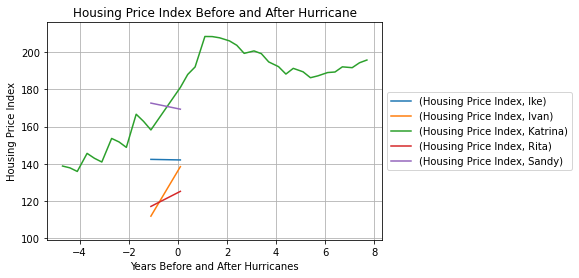

In [10]:
HIndex_merge_df.plot(x = 'Delta')
plt.title('Housing Price Index Before and After Hurricane')
plt.xlabel('Years Before and After Hurricanes')
plt.ylabel('Housing Price Index')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.savefig('./Graphs/HousingPriceIndex.png')
